In [1]:
%load_ext autoreload
import uproot as ut
import awkward as ak
import matplotlib.pyplot as plt
import numpy as np
import re
import sympy as sp
import math
import vector


from tqdm import tqdm
import timeit

from utils import *
%autoreload 2

In [2]:
signal_tree = Tree(fc.NMSSM_MX_700_MY_400)
signal_selection = jet_cut(signal_tree,Selection(signal_tree))

In [3]:
qcd_b_tree = Tree(fc.QCD_B_List)
qcd_b_selection = jet_cut(qcd_b_tree,Selection(qcd_b_tree))

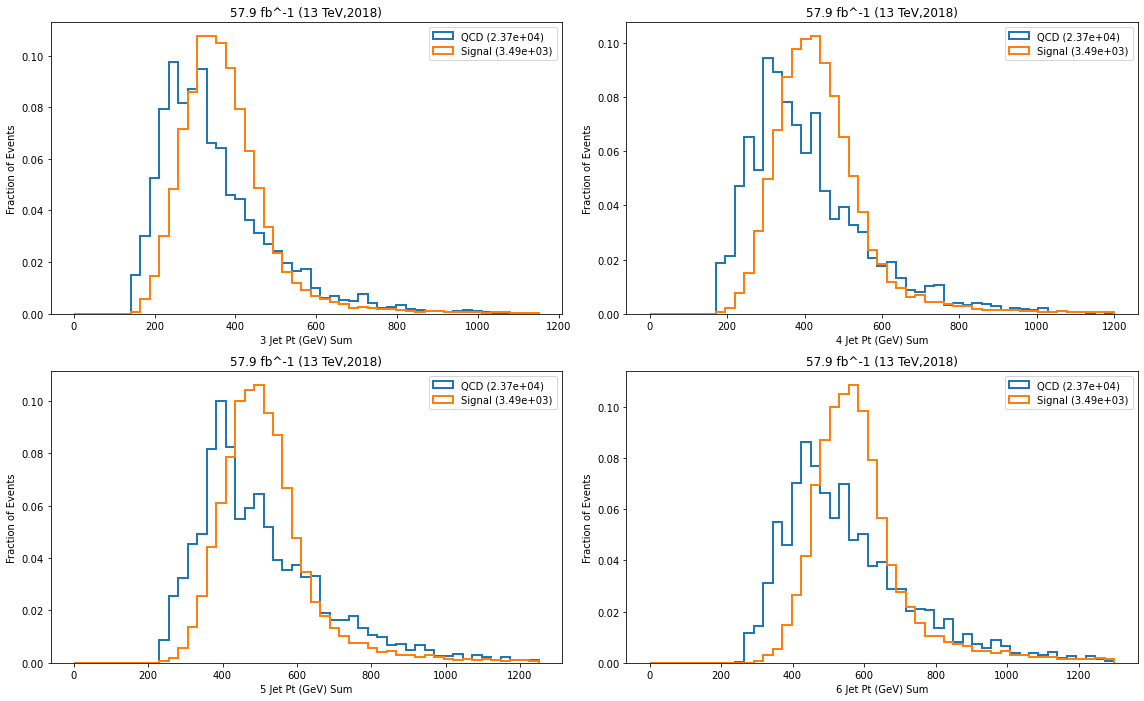

In [65]:
study.njet_var_sum([qcd_b_selection,signal_selection],labels=["QCD","Signal"],density=1,variable="jet_pt")

In [23]:
btagWPs = jet_btagWP[1:]+[1]
get_btagWPs = lambda tree,selection,tag : [ Selection(tree,cuts=dict(btagcut=btagWPs[wp]),include=selection,tag=f"{tag} {wplabels[wp+1]} btag") for wp in range(3) ]
signal_btagwps = get_btagWPs(signal_tree,signal_selection,"Signal")
qcd_b_btagwps =  get_btagWPs(qcd_b_tree,qcd_b_selection,"QCD")

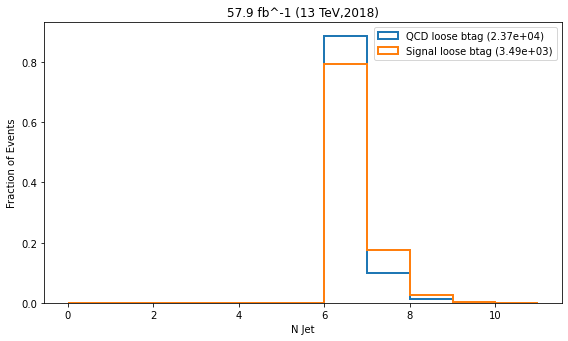

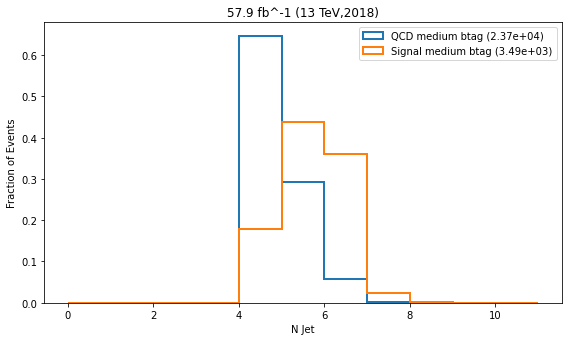

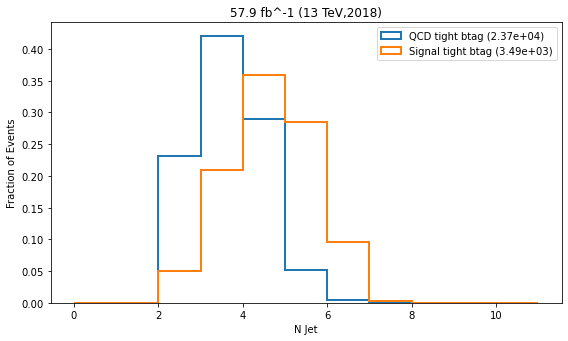

In [24]:
btagwps = list(zip(qcd_b_btagwps,signal_btagwps))
for wp in range(3): study.njets(btagwps[wp],density=1)

In [53]:
def plot_test(qcd,signal):
    print(signal)
    print(qcd)
    
    print(f"QCD/Signal: {ak.sum(qcd['scale'])/ak.sum(signal['scale']):0.2f}")
    
    study.jets([qcd,signal],labels=["QCD","Signal"],density=1)

In [40]:
def test_cut_1(tree,base):
    selection = Selection(tree,cuts=dict(btagcut=jet_btagWP[mediumWP],njetcut_invert=5),include=base)
    selection = Selection(tree,previous=selection,include=base)
    return selection.merge("test cut 1")
signal_test1 = test_cut_1(signal_tree,signal_selection)
qcd_b_test1  = test_cut_1(qcd_b_tree,qcd_b_selection)

--- (all selected & all signal selection & all test cut 1) ---
Event Efficiency:   0.18
Selected Purity(6): 0.28
Passed Jet S/T:     0.82
--- (all selected & all signal selection & all test cut 1) ---
Event Efficiency:   0.6
QCD/Signal: 24.73


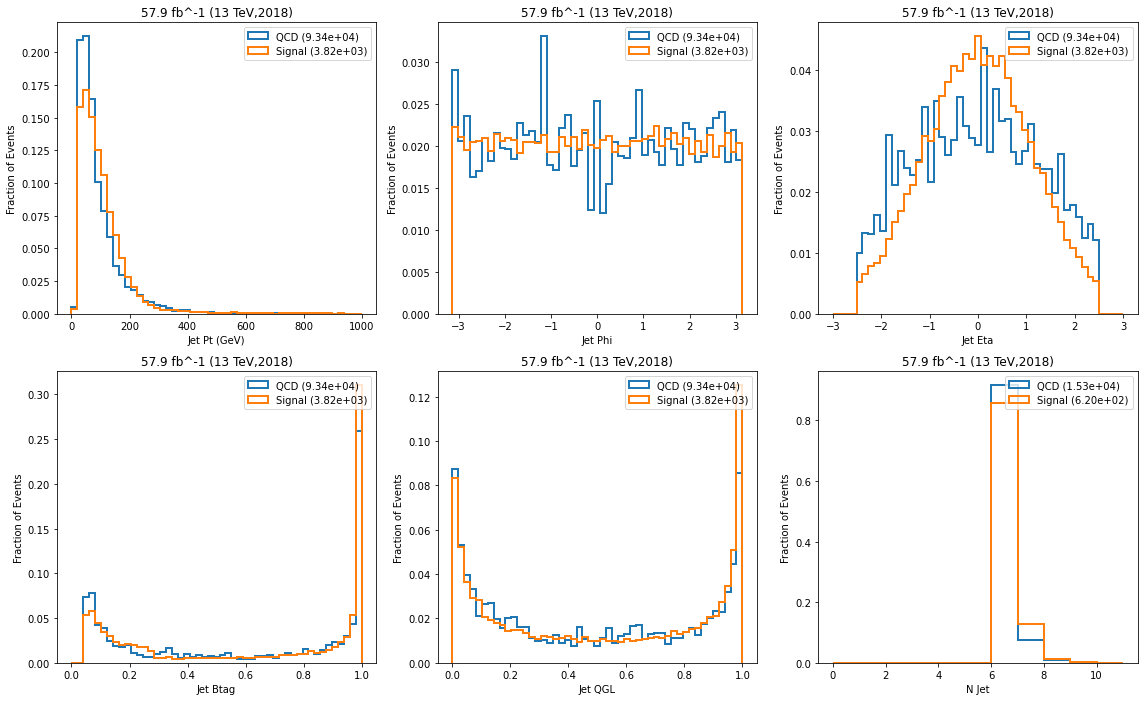

In [54]:
plot_test(qcd_b_test1,signal_test1)

In [58]:
def test_cut_2(tree,base):
    fivejet_btag_sum = ak.sum(base.get("jet_btag")[:,:6],axis=-1)
    mask = fivejet_btag_sum < 4
    return Selection(tree,mask=mask,include=base)
signal_test2 = test_cut_2(signal_tree,signal_selection)
qcd_b_test2  = test_cut_2(qcd_b_tree,qcd_b_selection)

--- (all selected & all signal selection & all selected) ---
Event Efficiency:   0.21
Selected Purity(6): 0.30
Passed Jet S/T:     0.82
--- (all selected & all signal selection & all selected) ---
Event Efficiency:   0.68
QCD/Signal: 22.94


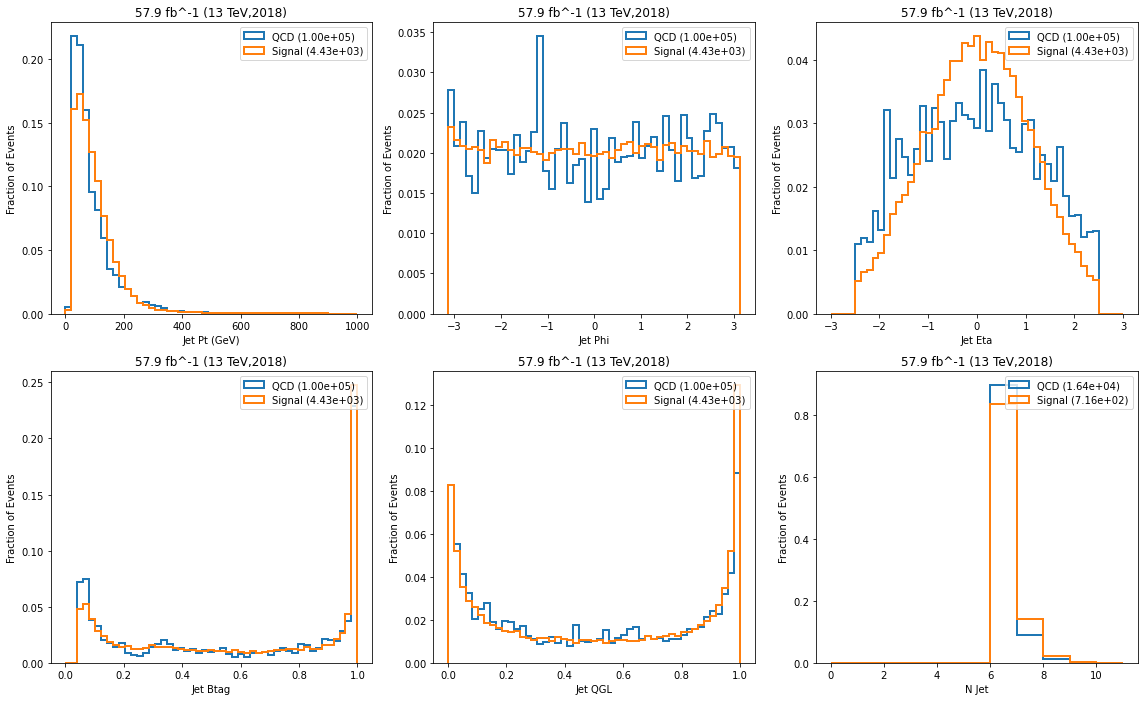

In [59]:
plot_test(qcd_b_test2,signal_test2)

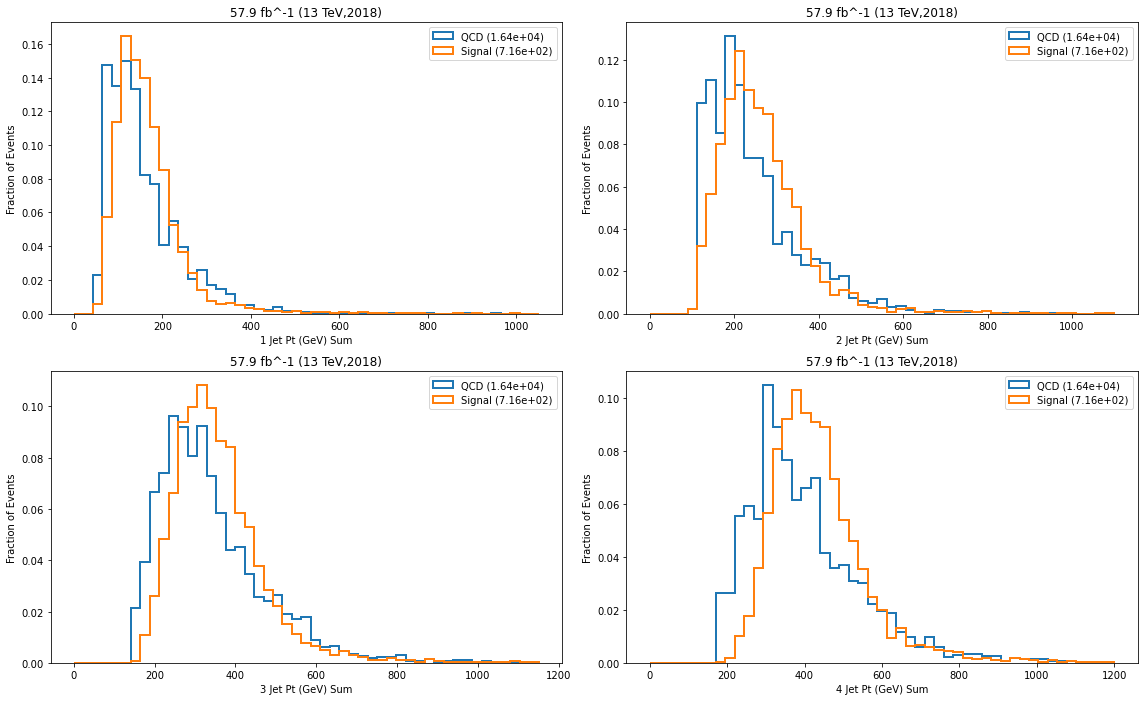

In [62]:
study.njet_var_sum([qcd_b_test2,signal_test2],labels=["QCD","Signal"],density=1,variable="jet_pt")